<h1>Esercizio 1</h1>

<h2>Punto 2.1</h2>

In [4]:
# definisco una funzione che restituisce il valore della funzione di massa di probabilità in funzione di k e lambda
import math

def p_poisson(k, l):
    return math.e**(-1 * l) * l**k / math.factorial(k)

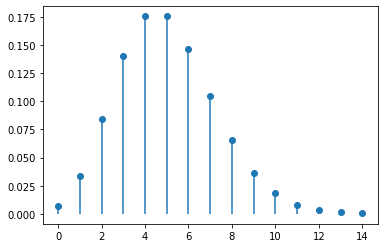

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

l = 5

ks = np.arange(0, 15)
ps = [p_poisson(k, l) for k in ks]

plt.vlines(ks, 0, ps)
plt.plot(ks, ps, 'o')
plt.show()

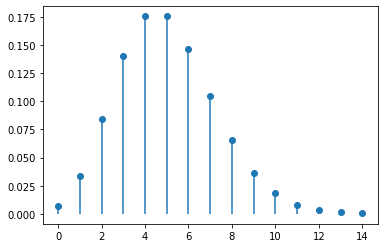

In [29]:
# metodo alternativo utilizzando scipy.stats
import scipy.stats as st

# creo un oggetto variabile aleatoria di Poisson con parametro l = lambda = 5
X = st.poisson(l)
y = X.pmf(ks)

plt.vlines(ks, 0, y)
plt.plot(ks, y, 'o')
plt.show()

<h2>Punto 2.2</h2>

In [33]:
# 1 - P(X <= 6)
1 - sum([X.pmf(k) for k in np.arange(0,7)])

0.23781653702706163

In [34]:
# metodo alternativo utilizzando la funzione di ripartizione
1 - X.cdf(6)

0.2378165370270613

<h2>Punto 2.3</h2>

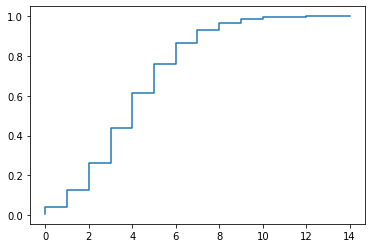

In [38]:
# la funzione di ripartizione di una variabile aleatoria discreta è costante a tratti, perciò si usa il metodo step
plt.step(ks, X.cdf(ks))
plt.show()

In [39]:
k = 0
while X.cdf(k) < 0.8:
    k += 1

print(k)

7


In [43]:
X.cdf(6), X.cdf(7)
# per cui ho verificato che 7 è la più piccola specificazione che ha come valore
# della funzione di ripartizione un valore >= 0.8

(0.7621834629729387, 0.8666283259299925)

In [44]:
# metodo alternativo: utilizzo dei quantili (metodo ppf)
X.ppf(0.8)

7.0

<h1>Esercizio 2</h1>

In [59]:
import pandas as pd

acqua = pd.read_csv('ComposizioneAcqua.csv')
acqua

,NomeSorgente,Oro,DurezzaAcqua
0,Sorgente1,0,21.201381
1,Sorgente1,0,25.294662
2,Sorgente1,4,12.435279
3,Sorgente1,3,16.146828
4,Sorgente1,0,21.091517
...,...,...,...
1645,Sorgente5,4,5.601863
1646,Sorgente5,4,6.642368
1647,Sorgente5,6,3.134170
1648,Sorgente5,2,12.190175


<h2>Punto 1</h2>

In [48]:
len(acqua)

1650

<h2>Punto 2</h2>

In [49]:
len(acqua) * 5

8250

<h2>Punto 3</h2>

In [54]:
len(acqua['NomeSorgente'].unique())

def num_values(series):
    return len(series.unique())

num_values(acqua['NomeSorgente'])

5

<h2>Punto 4</h2>

In [61]:
def gini(series):
    return 1 - sum(series.value_counts(normalize=True).map(lambda f: f**2))

def normalized_gini(series):
    s = num_values(series)
    return s * gini(series) / (s - 1)

In [62]:
normalized_gini(acqua['NomeSorgente'])

0.980257116620753

Questo valore è vicino all'unità per cui il livello di eterogeneità è alto.
Questo implica un livello <b>alto</b> di uniformità per le sorgenti.

<h2>Punto 5</h2>

In [70]:
gold_rel_freq = acqua['Oro'].value_counts(normalize=True, sort=False)
gold_rel_freq

0     0.276364
1     0.296364
2     0.198788
3     0.086667
4     0.048485
5     0.038182
6     0.029091
7     0.012121
8     0.007273
9     0.002424
10    0.002424
11    0.001818
Name: Oro, dtype: float64

In [68]:
# alternativa
pd.crosstab(index=acqua['Oro'],
            columns=['Frequenza'],
            normalize=True,
            colnames=[''])

,Frequenza
Oro,
0,0.276364
1,0.296364
2,0.198788
3,0.086667
4,0.048485
5,0.038182
6,0.029091
7,0.012121
8,0.007273


<h2>Punto 6</h2>

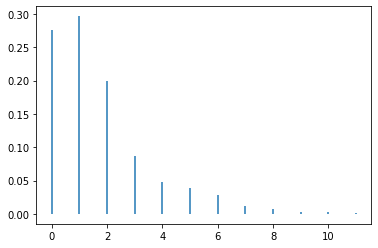

In [74]:
plt.vlines(gold_rel_freq.index, 0, gold_rel_freq.values)
plt.show()

<h2>Punto 7</h2>

In [75]:
# media campionaria e varianza campionaria
(acqua['Oro'].mean(), acqua['Oro'].var())

(1.7224242424242424, 3.4025896319164968)

In [77]:
# metodo alternativo per il calcolo della media

totAcqua = 0
for aS in acqua['Oro']:
    totAcqua += aS

totAcqua / len(acqua['Oro'])

1.7224242424242424

<h2>Punto 8</h2>

In [78]:
# calcolo della media campionaria, fatto già nel punto 7
acqua['Oro'].mean()

1.7224242424242424

<h2>Punto 9</h2>

In [82]:
# verifichiamo se ci sono valori mancanti
sum(acqua['Oro'].isnull()) # soluzione con cast

0

In [83]:
# soluzione alternativa con il metodo any() che restituisce true se esiste almeno una riga per cui l'attributo vale true
acqua['Oro'].isnull().any()

False

<h1>Esercizio 3</h1>

<h2>Punto 1</h2>

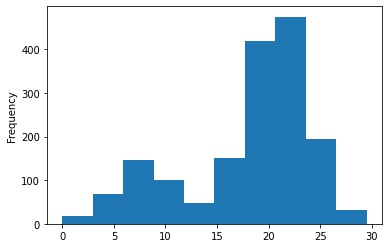

In [86]:
acqua['DurezzaAcqua'].plot.hist()
plt.show()

<h2>Punto 2</h2>

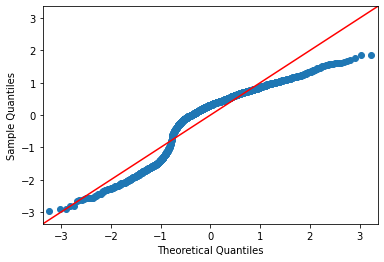

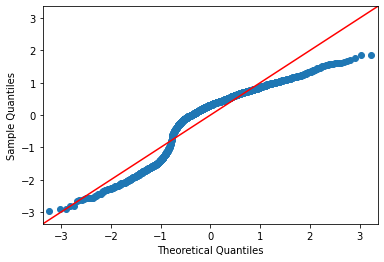

In [90]:
import statsmodels.api as sm

sm.qqplot(acqua['DurezzaAcqua'], fit=True, line='45')

<h2>Punto 3</h2>

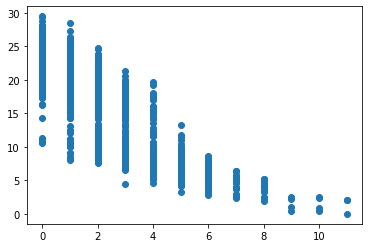

In [92]:
plt.scatter(acqua['Oro'], acqua['DurezzaAcqua'])
plt.show()

In [95]:
acqua['Oro'].corr(acqua['DurezzaAcqua'])

-0.842768630507854

In [100]:
sum((acqua['Oro'] - acqua['Oro'].mean()) * (acqua['DurezzaAcqua'] - acqua['DurezzaAcqua'].mean()))
# manca divisione per (n - 1) e dividere per prodotto delle devizioni standard campionarie

-15610.134999397917

<h2>Punto 4</h2>

Il fatto che il coefficiente sia vicino a -1, conferma che tra i due attributi esista una relazione lineare di tipo inverso, di carattere abbastanza forte.

<h2>Punto 5</h2>

In [101]:
Z = st.norm()

<h2>Punto 6</h2>

In [108]:
acqua.groupby('NomeSorgente').mean()

,Oro,DurezzaAcqua
NomeSorgente,,
Sorgente1,0.970000,21.009675
Sorgente2,1.048000,20.836725
Sorgente3,1.120000,20.696062
Sorgente4,1.068000,20.917371
Sorgente5,4.228571,7.754144


<h2>Punto 7</h2>

In [114]:
sorgente_5 = acqua[acqua['NomeSorgente'] == 'Sorgente5'].loc[:, ['Oro', 'DurezzaAcqua']]

In [115]:
altre_sorgenti = acqua[acqua['NomeSorgente'] != 'Sorgente5'].loc[:, ['Oro', 'DurezzaAcqua']]

<h2>Punto 8</h2>

In [119]:
num_particelle_5 = sorgente_5['Oro'].mean()

In [120]:
num_altre_sorgenti = altre_sorgenti['Oro'].mean()

In [122]:
(num_particelle_5, num_altre_sorgenti)

(4.228571428571429, 1.0476923076923077)

<h2>Punto 9</h2>

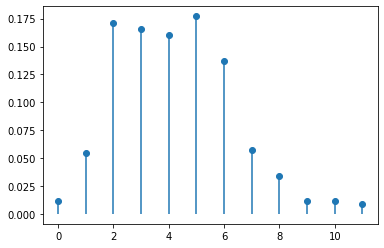

In [126]:
s5_rel_freq = sorgente_5['Oro'].value_counts(normalize=True, sort=False)
plt.vlines(s5_rel_freq.index, 0, s5_rel_freq.values)
plt.plot(s5_rel_freq.index, s5_rel_freq.values, 'o')
plt.show()

In [128]:
(sorgente_5['Oro'].mean(), sorgente_5['Oro'].var())

(4.228571428571429, 4.38886614817847)

<h2>Punto 10</h2>

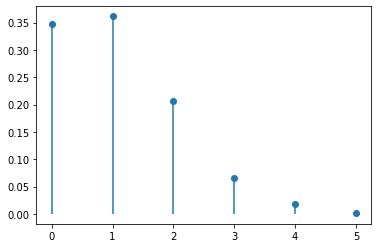

In [129]:
aS_rel_freq = altre_sorgenti['Oro'].value_counts(normalize=True, sort=False)
plt.vlines(aS_rel_freq.index, 0, aS_rel_freq.values)
plt.plot(aS_rel_freq.index, aS_rel_freq.values, 'o')
plt.show()

In [130]:
(altre_sorgenti['Oro'].mean(), altre_sorgenti['Oro'].var())

(1.0476923076923077, 0.9923349321963642)

<h2>Punto 11</h2>

In [132]:
l_5 = sorgente_5['Oro'].mean() / 5
l_5

0.8457142857142858

In [133]:
T_5 = st.expon(scale=1/l_5)

In [135]:
1 - T_5.cdf(10)

0.00021237799893225606

<h2>Punto 12</h2>

Per <b>assenza di memoria</b>, la probabilità richieste è uguale alla probabilità calcolata nel punto 11.

<h2>Punto 13</h2>

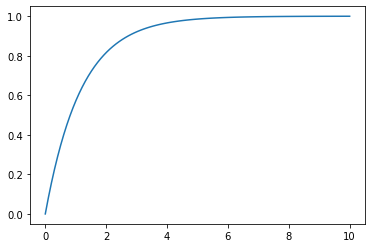

In [139]:
ts = np.linspace(0, 10, 100)

plt.plot(ts, T_5.cdf(ts))
plt.show()

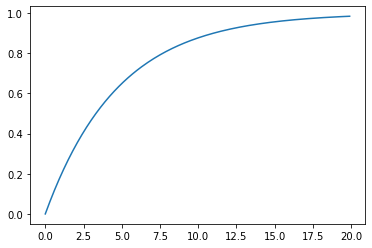

In [141]:
l_altre = altre_sorgenti['Oro'].mean() / 5
T_altre = st.expon(scale=1/l_altre)

ts = np.arange(0, 20, .1)
plt.plot(ts, T_altre.cdf(ts))
plt.show()

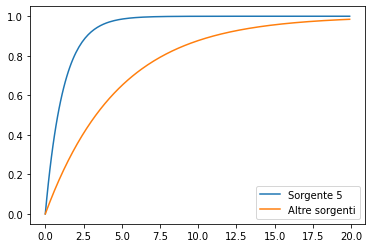

In [145]:
ts = np.arange(0, 20, .1)

plt.plot(ts, T_5.cdf(ts), label='Sorgente 5')

l_altre = altre_sorgenti['Oro'].mean() / 5
T_altre = st.expon(scale=1/l_altre)


plt.plot(ts, T_altre.cdf(ts), label='Altre sorgenti')
plt.legend()
plt.show()

<h1>Esercizio 4</h1>

<h2>Punto 1</h2>

In [149]:
sigma_x = sorgente_5['Oro'].std()
eps = 0.1
n = len(sorgente_5)
n

350

In [152]:
Z = st.norm()
2 * Z.cdf(eps / (sigma_x / n ** 0.5)) - 1

0.6281498695096628

<h2>Punto 2</h2>

In [156]:
n_min = math.ceil((sigma_x / eps * Z.ppf(0.95)) ** 2)
n_min

1188

In [157]:
n_min - n # 'pacchetti' da 5 litri da analizzare

838

In [158]:
5 * (n_min - n) # litri da analizzare

4190

<h2>Punto 3</h2>

In [159]:
100 * (3 * num_particelle_5 - 10)

268.57142857142867

In [161]:
var_g = 1.5 ** 2 * 200 * num_particelle_5
var_g

1902.857142857143

In [162]:
var_g ** 0.5

43.62175079999819